In [41]:
import cv2
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
from matplotlib import collections  as mc

import seaborn as sns
from PIL import Image
import numpy as np

In [42]:
img = cv2.imread('../wine_label/educated_guess.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

feat_detector = cv2.FeatureDetector_create('SIFT')
sift = cv2.DescriptorExtractor_create("SIFT")

kps = feat_detector.detect(img)
(kps, descriptors) = sift.compute(img, kps)
# kp = np.array([x.pt for x in kps])

In [43]:
kp_circles = pd.DataFrame([(x.pt[0], x.pt[1], x.size, x.angle) for x in kps],
                          columns=['xdata','ydata','radius', 'angle']).sort_values(['radius'], ascending=False)


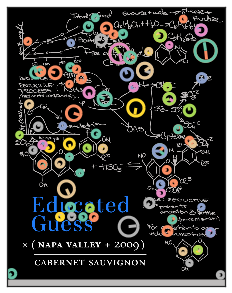

In [47]:
# kp = sift.drawKeypoints(gray, None)
# img2 = cv2.drawKeypoints(img, kps)

fig = plt.figure()
fig.set_size_inches(10,5)
ax = plt.axes()

ax.imshow(img)
ax.grid('off')
_ = ax.set_xticklabels([])
_ = ax.set_yticklabels([])

xlim = ax.get_xlim()
ax.set_xlim(35, xlim[1]-35)

ylim = ax.get_ylim()
ax.set_ylim(ylim[0], 45)

colors = sns.color_palette("Set2", 10)
sp = fig.add_subplot(111)
lw = 3.0

for (row,dat) in kp_circles.iloc[:100].iterrows():
    xpos = dat.xdata
    ypos = dat.ydata
    rad = dat.radius
    ang = dat.angle*np.pi*2.0

    color = colors[row % 10]

    # c = plt.Circle((xpos, ypos), radius=rad, edgecolor=color, color=None, lw=2.0)
    c = mpl.patches.Arc((xpos, ypos), rad, rad, 
                        angle=0.0, theta1=0.0, 
                        theta2=360.0, lw=lw, 
                        edgecolor=color)
    
    l = mc.LineCollection([[(xpos, ypos), (xpos+(rad/np.sqrt(6))*np.cos(ang), ypos+(rad/np.sqrt(6))*np.sin(ang))]], 
                          colors=color, linewidths=lw)
    sp.add_artist(c)
    sp.add_artist(l)

    
# fig.savefig('../figures/29_presentation_figures_label_keypoints.png', dpi=300)

# ext = cv2.DescriptorExtractor_create("SIFT")
# img=cv2.drawKeypoints(gray,kp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# cv2.imwrite('sift_keypoints.jpg',img)
# eps=1e-7
# (kps, descs) = self.extractor.compute(image, kps)

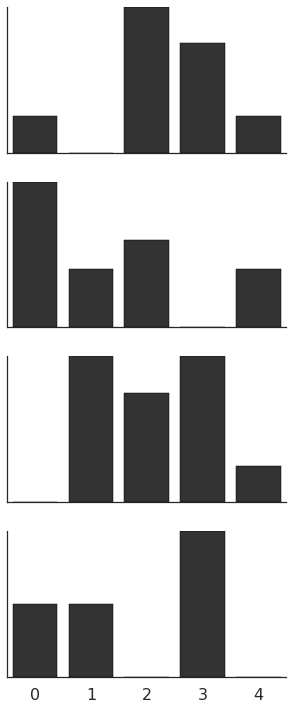

In [55]:
sns.set_context('poster')
sns.set_palette('dark')
sns.set_style('white')
sns.axes_style({'axes.linewidth': 5.0})

fig, axList = plt.subplots(nrows=4)
fig.set_size_inches(5,12)

blue = sns.color_palette()[0]
num_bars = 5

hists = [np.array([1, 0, 4, 3, 1]),
         np.array([5, 2, 3, 0, 2]),
         np.array([0, 4, 3, 4, 1]),
         np.array([2, 2, 0, 4, 0])]

for ax,hist in zip(axList, hists):
    sns.barplot(np.arange(num_bars), hist, color='#333333', ax=ax)
    ax.set_yticklabels([])
    
    if not ax.is_last_row():
        ax.set_xticklabels([])
    sns.despine()

#plt.tight_layout()
fig.savefig('../figures/29_presentation_figures_barplots.png', dpi=300)